# LSE Machine Learning: Practical Applications

## Module 8 Unit 1 IDE Activity (Assessment) | Execute principal component analysis

The instructions for this IDE activity are positioned as text cells before each step. You are required to read the text cells above a code cell, familiarise yourself with the required step, and execute the step. You are encouraged to refer back to the practice IDE activity to familiarise yourself with the different steps and how they are executed in R. In the *Pause and reflect* sections you will see the text "**YOUR ANSWER HERE**". Please type your answer there.


#### 1. Load the relevant R packages   
For data manipulation, use the `tidyverse` package. `GGally` and `factoextra` are used to visualise the data. The heptathlon data set is accessed through the `HSAUR` package.



In [1]:
library("tidyverse") 
library("HSAUR") 
library("GGally") 
library("factoextra") 

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: tools

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



#### 2. Load the data

In [2]:
data(heptathlon)

#### 3. View the athletes and disciplines in the data set

In [3]:
heptathlon

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291
John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897
Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858
Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540
Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540
Schulz (GDR),13.75,1.83,13.50,24.65,6.33,42.82,125.79,6411
Fleming (AUS),13.38,1.80,12.88,23.59,6.37,40.28,132.54,6351
Greiner (USA),13.55,1.80,14.13,24.48,6.47,38.00,133.65,6297
Lajbnerova (CZE),13.63,1.83,14.28,24.86,6.11,42.20,136.05,6252


#### 4. View the discipline and final score distributions using box plots

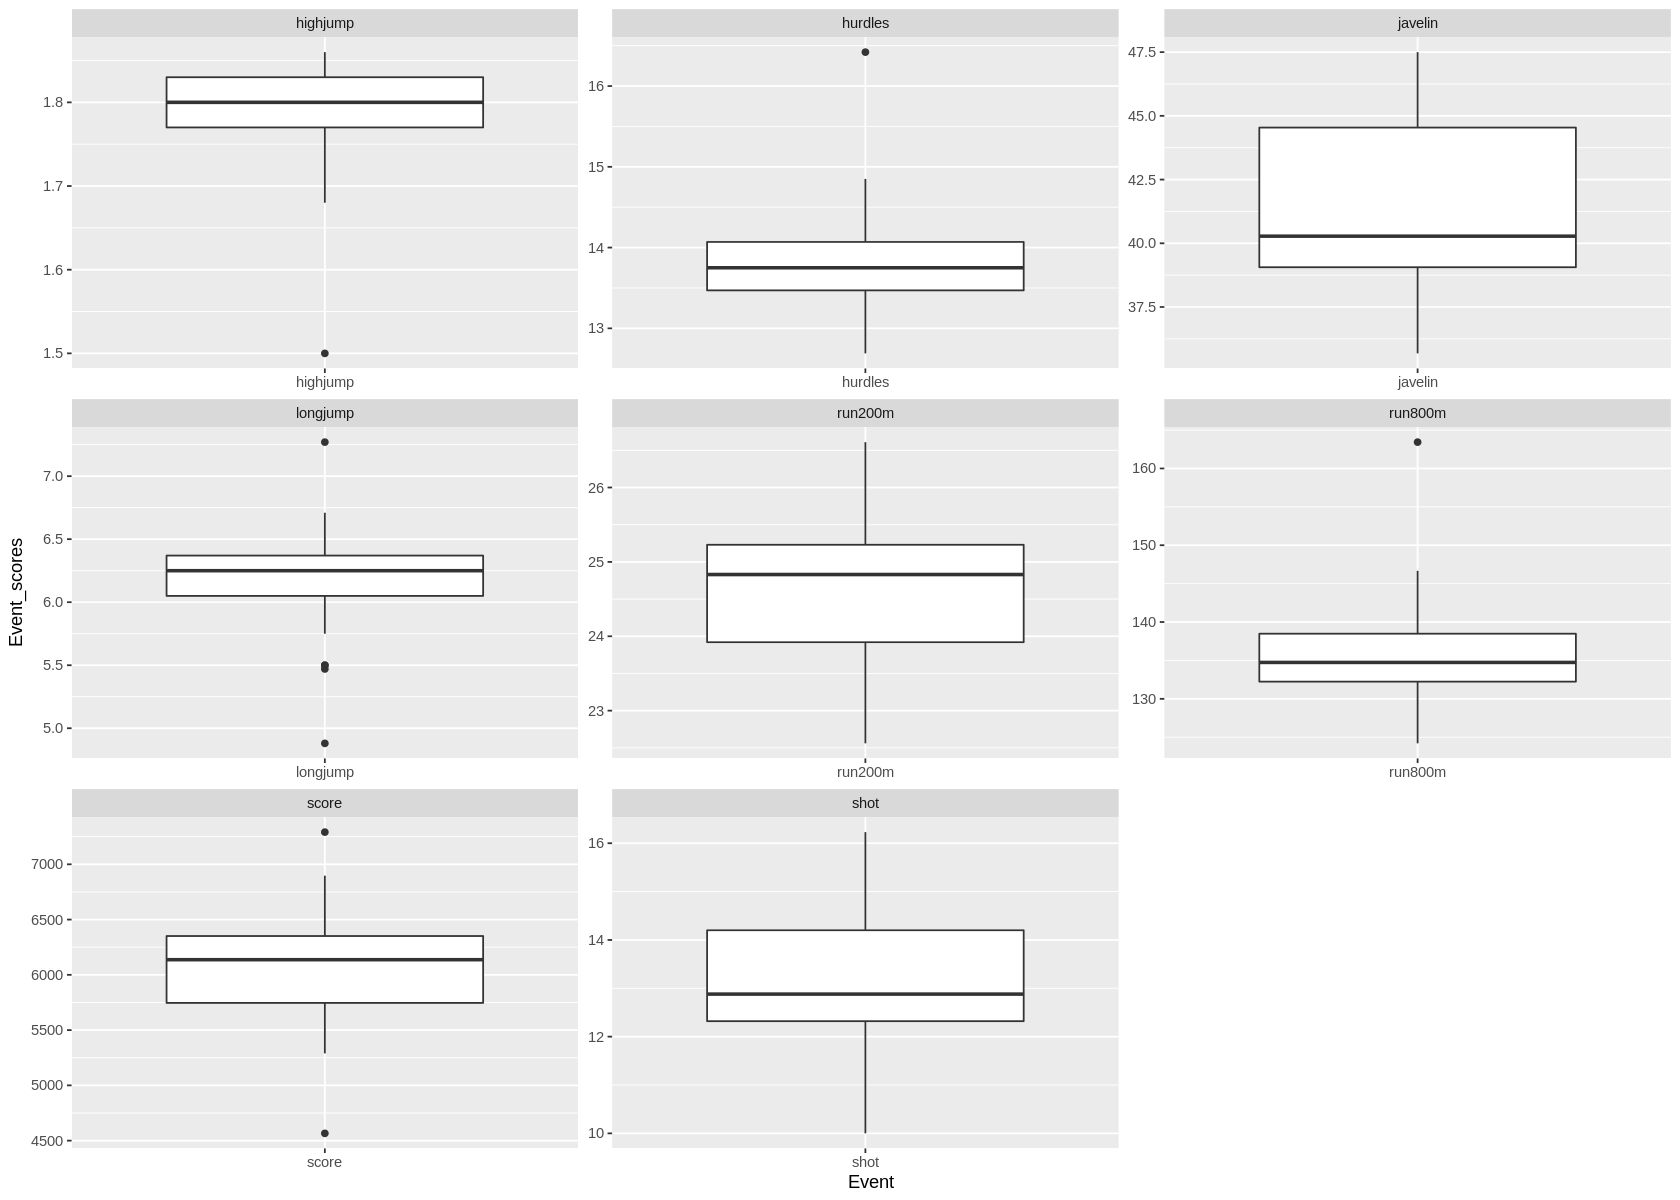

In [10]:
options(repr.plot.width=14, repr.plot.height=10)

gather(heptathlon, "Event", "Event_scores")  %>% 
    ggplot(aes(x=Event, y=Event_scores)) + 
    geom_boxplot() +
    facet_wrap(~Event, scale="free")



**Pause and reflect:**  
- What conclusions can you make about the disciplines from the box plots? Are any distributions skewed positively or negatively due to an outlier? 
- What do you notice about the values on the _y_-axis if you compare all the variables?

YOUR ANSWER HERE
1.There are three variables that are surely skewed in the dataset. The positively skewed (right-skewed) are the hurdles and run800m. The other variable, the high jump, is negatively skewed (left-skewed). Also, we could say that the variable Javelin is slightly positively skewed. 
2.The value of the y-axis is different in every variable. This means that except for centring the data, we should scale them also.


#### 5. Consider the correlation between variables

**Hint:**  To interpret the correlation plots, note the following:
- Along the diagonal are the distributions of each variable as seen in the box plots.
- The upper diagonal contains the correlation values between all the variables. 
- The lower diagonal contains scatterplots and a line showing the trend (red) with an error (grey shading). The achievement of each event is plotted against the achievement of the other events (e.g. ***highjump*** score vs ***run200m*** score) to generate the scatterplots. The last row shows the overall score against each event achievement.

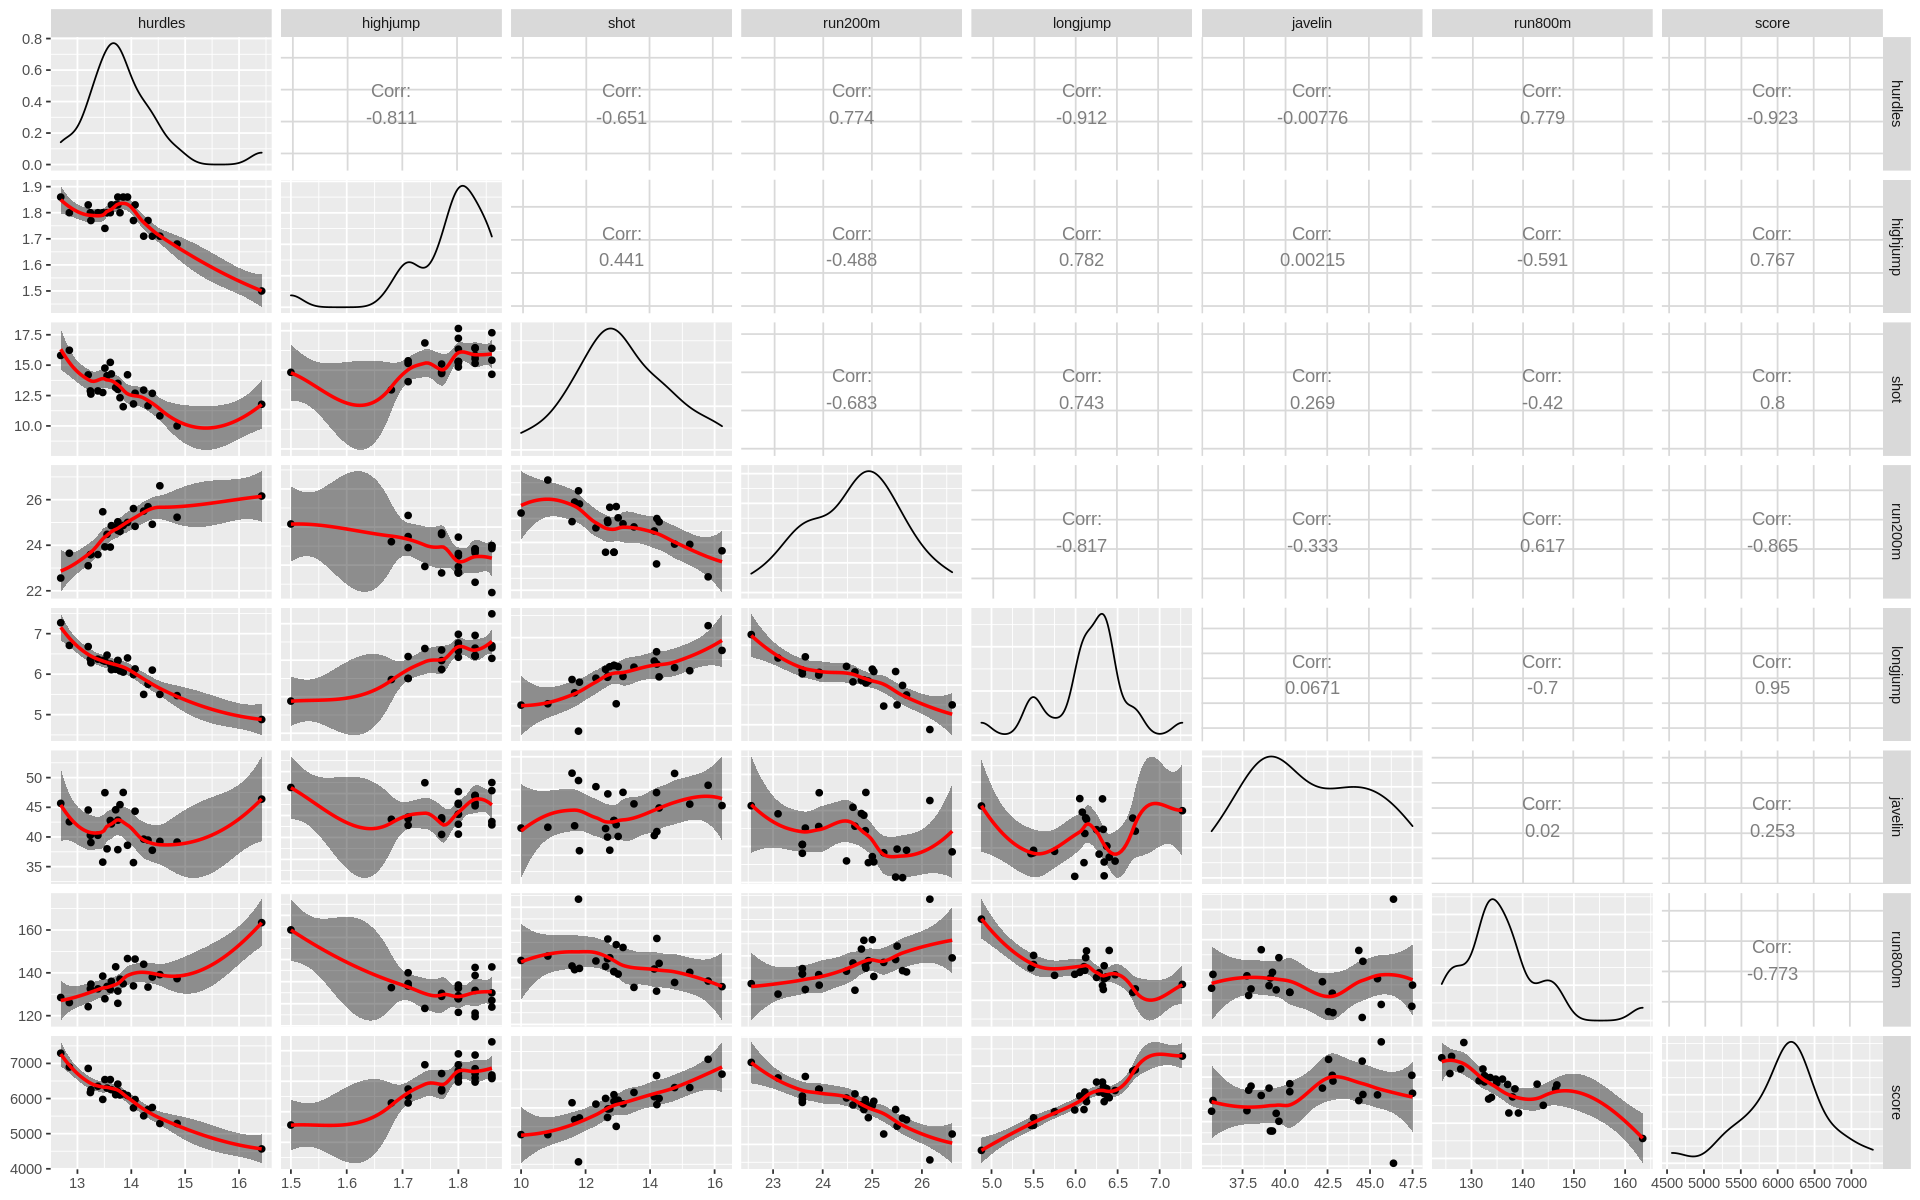

In [5]:
options(repr.plot.width=16, repr.plot.height=10)

# Correlation plot 
my_fn <- function(data, mapping, ...){ 
    p <- ggplot(data = data, mapping = mapping) +
         geom_point() + 
         geom_smooth(formula = 'y ~ x', method=loess, fill="Black", color="red", ...)
    p
} 
ggpairs(heptathlon, lower = list(continuous = my_fn ))


**Pause and reflect:**
- Which variables are positively correlated?
- Which variables are negatively correlated?
- Can you see any patterns emerging? Are athletes who do well in the track events also good at high jump or long jump? 
- Which events correlate with a high overall score?

YOUR ANSWER HERE
Generally, the sports that include the running element, specifically the hurdles, run200m, run800m (endurance-based sports), are positively correlated. Furthermore, sports that are power-based (longjump, javelin, shot, highjump) are negatively correlated with endurance-based sports. In addition, some neutral correlations exist between some of the power-based sports, such as the highjump-javelin correlation. Moreover, the athletes that were good at highjump were not good at track sports (run200m, run800m, hurdles). The same applies to the athletes who did well in longjump. Also, the athletes who performed well in the highjump were good at longjump (positively correlated). Concluding the athletes who performed well in the track events (run200m, run800m, hurdles) were not so good in the overall score. On the other hand, the athletes who had a good performance in highjump, shot and longjump also had an excellent overall score.

#### 6. Apply PCA and review the output

**Note:** The ***score*** variable is a dependent variable and is not included in this principal component analysis.

**Hints:**
- Use the `prcomp` function.
- Assign the PCA model to the variable name `heptathlon_pca`.
- Do not include the `score` variable by using `heptathlon[,-c(8)]` to define the data to be used by the model.
- Scale and centre the data.


In [15]:
# Create a training set and reduce using PCA
heptathlon_pca=prcomp(heptathlon[,-c(8)], scale = TRUE, center = TRUE)

**Hint:** Review the output using the `summary` function.

In [16]:
# Review the output
summary(heptathlon_pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     2.1119 1.0928 0.72181 0.67614 0.49524 0.27010 0.2214
Proportion of Variance 0.6372 0.1706 0.07443 0.06531 0.03504 0.01042 0.0070
Cumulative Proportion  0.6372 0.8078 0.88223 0.94754 0.98258 0.99300 1.0000

**Pause and reflect:** 

PC1 has the greatest proportion of variance. Is this always the case?

#### 7. Plot the cumulative impact of variance

**Hints:**
- Use `plot(cumsum({insert relevant code})*100, ...`
- Create appropriate labels for `main`, `xlab`, and `ylab`.

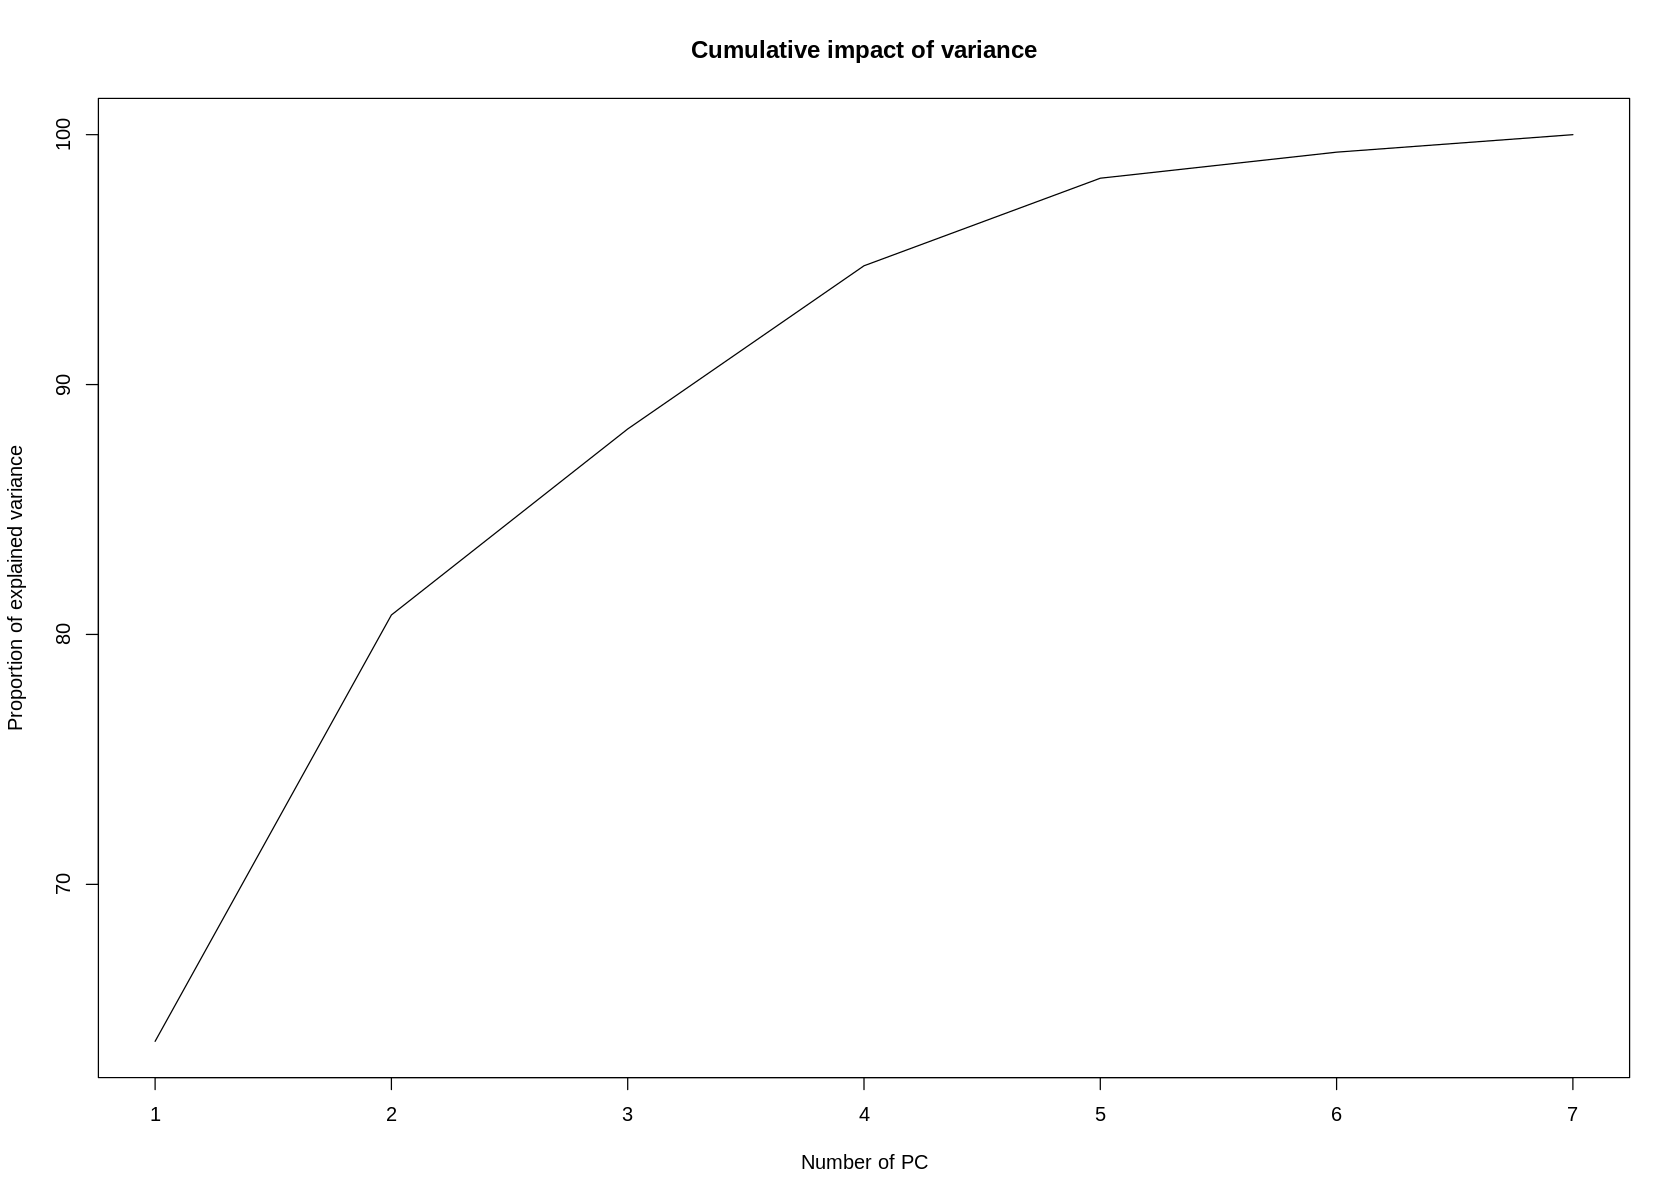

In [17]:
# Plot the cumulative impact of variance
plot(cumsum(heptathlon_pca$sdev^2)/sum(heptathlon_pca$sdev^2)*100,
     type="l",
     main='Cumulative impact of variance',
     xlab="Number of PC",
     ylab="Proportion of explained variance")

**Pause and reflect:**  
How many PCs account for about 80% of the variance? How many PCs would you choose?

YOUR ANSWER HERE  2 PCs account for about 80% of the variance.
The majority of variance can be explained with about 3 (90% of variance) to 4 (95% of variana) principal components. The remainder accounts for a comparatively small amount of variance, which decreases as the number of directions increase beyond 5. In this case, I would choose 3 PCs as they explain enough of the variance (90%), and the model will not overfit.

#### 8. Consider the loadings from the PCA

Recall that the loadings show the orientation of the PCs relative to the original variables.

In [23]:
# Loadings on first principal component
heptathlon_pca$rotation[,1]


hurdles   highjump       shot    run200m   longjump    javelin    run800m 
 0.4528710 -0.3771992 -0.3630725  0.4078950 -0.4562318 -0.0754090  0.3749594

**Pause and reflect:**  
Which discipline has the highest loading score in the positive direction, and which one in the negative direction?

YOUR ANSWER HERE 
Highest loading score in the positive direction: hurdles.
Highest loading score in the negative direction: longjump.


#### 9. Consider a biplot of the loadings



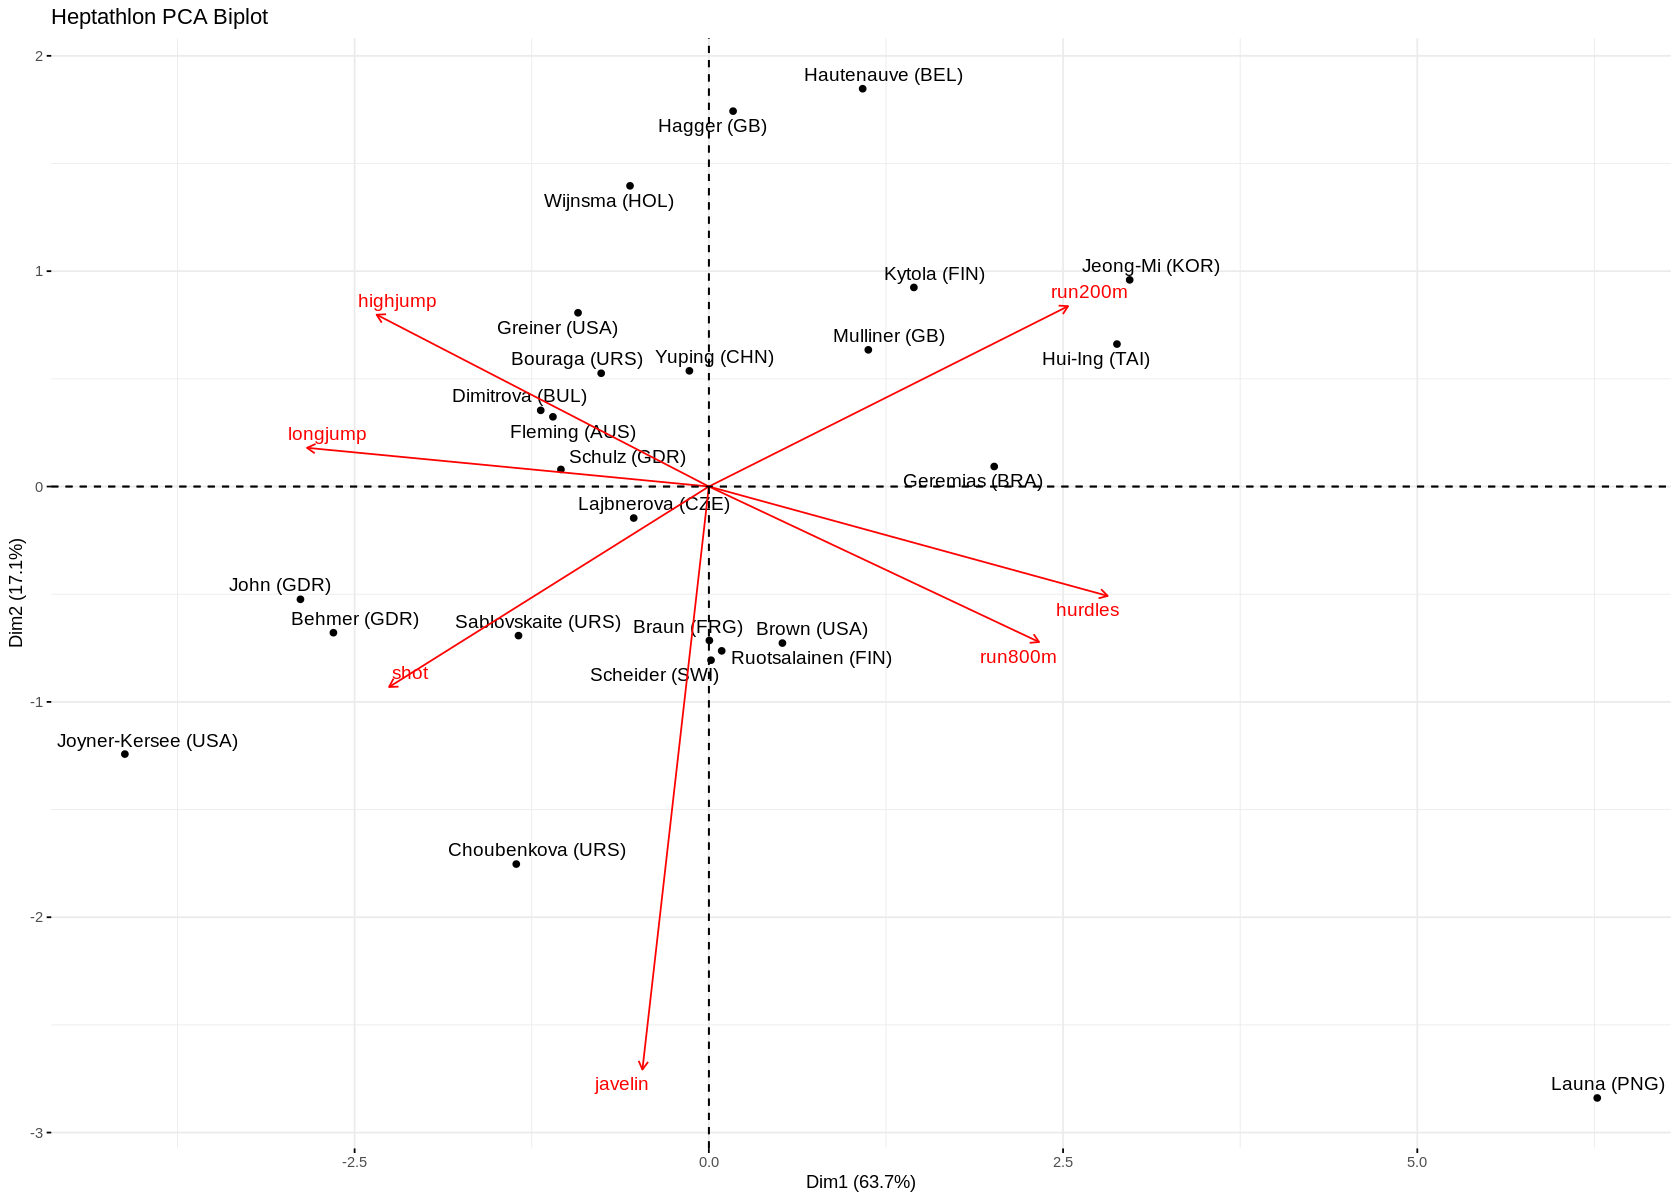

In [21]:
# Biplot 
fviz_pca_biplot(heptathlon_pca, 
                repel = TRUE,
                col.var = "red",
                title ="Heptathlon PCA Biplot")


**Pause and reflect:**  

- Which variables contribute the most to the first and second PCs?
- Are there variables forming groups?
- Notice the outliers Launa (PNG) and Joyner Kersee (USA). What observations can you make about them?





YOUR ANSWER HERE 
Longjump and hurdles have significant loadings, in absolute value, on PC1, but small loadings on PC2
On the other hand, Javelin and shot have significant loadings, in absolute value, on PC2, but small loadings on PC3
The variable run200m has some loadings in both PC1 and PC2. Two variables have similar loadings, run800m and hurdles (they could form a group). In addition, the run200m, hurdles and run800m have similar positive loadings on PC1. Similarly, the shot, longjump, and highjump have the same negative loadings on PC1. Furthermore, the highjump and longjump variables could form another group. The reason why outliers Joyner-Kersee and Launa are visible on the PCA plot is that having an outlier or a few outliers increases the variance in a specific direction. Moreover, Launa has huge loads (in absolute values) in both PC1 and PC2. Lastly, Joyner-Kersee has a more considerable loading (in absolute values) on PC1 than on PC2.

#### 10. Consider the correlation between the ***score*** variable and the first PC

In [24]:
# Correlation between score and first PC
cor(heptathlon$score, heptathlon_pca$x[,1])

[1] -0.9910978

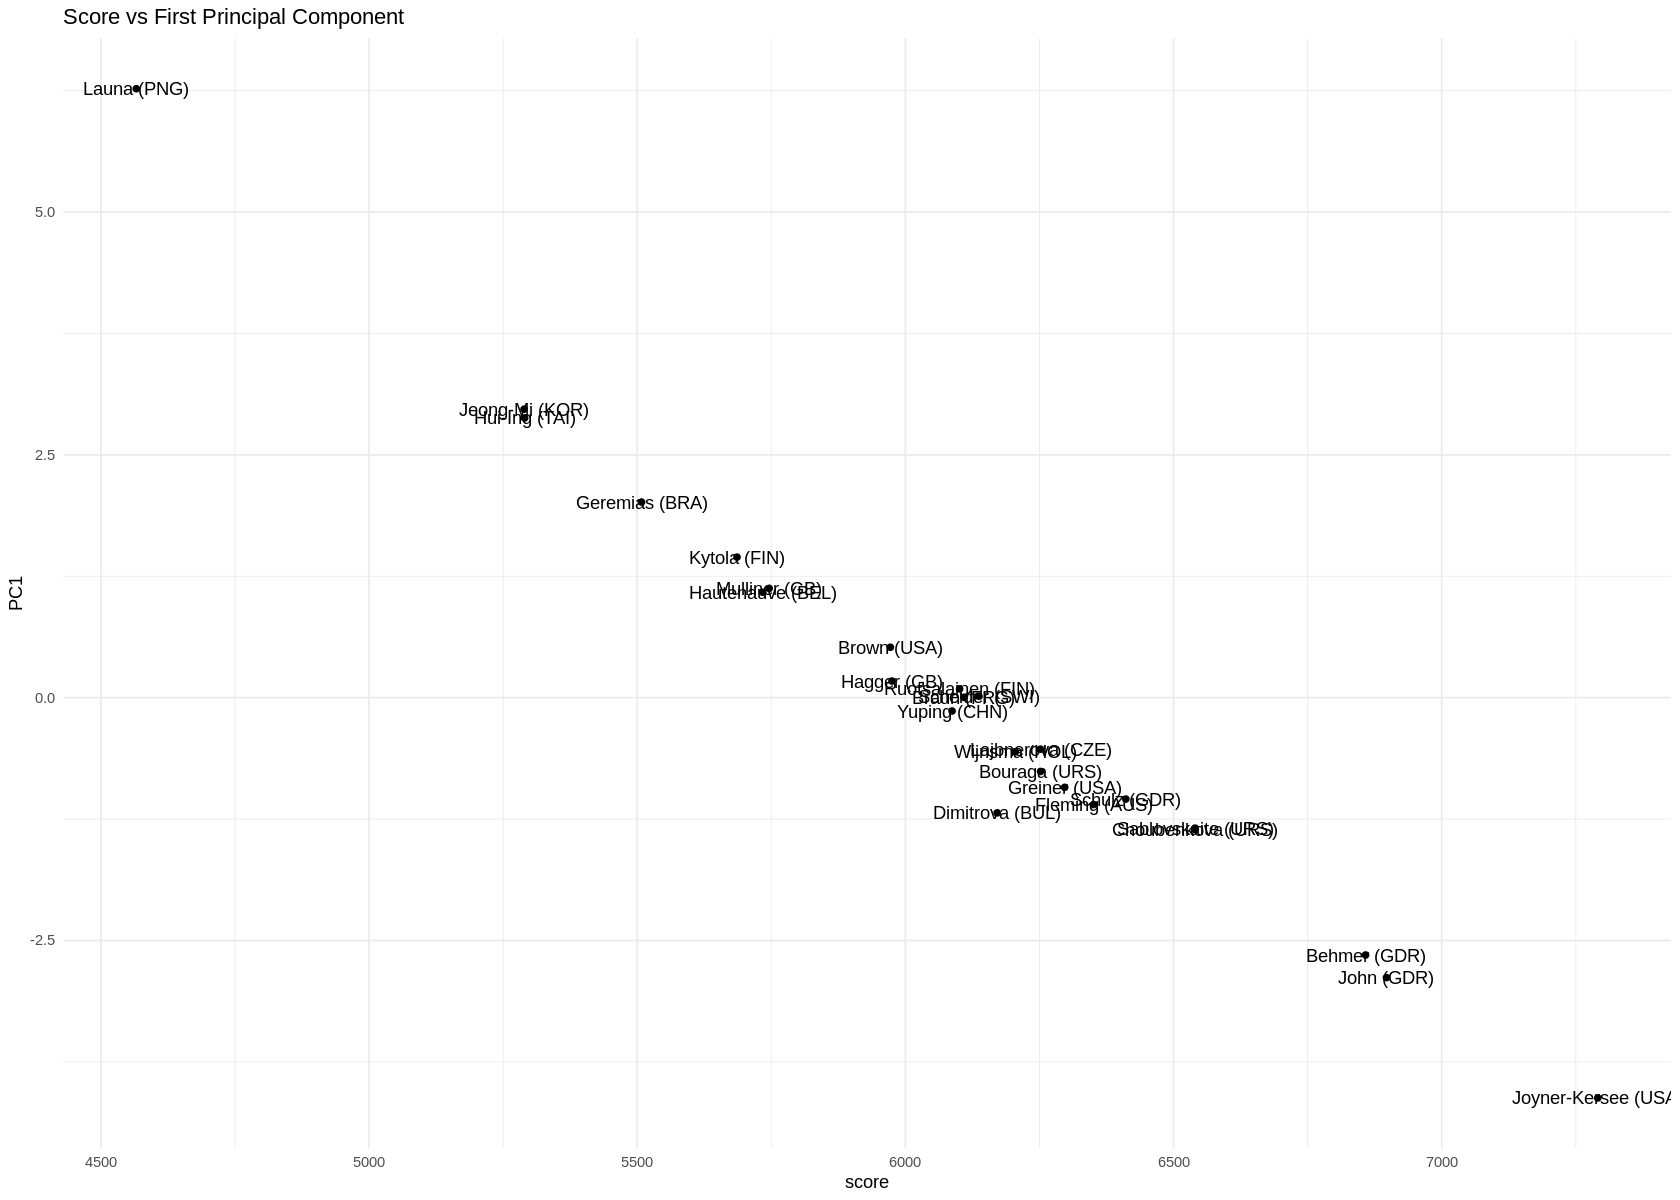

In [25]:
# Scatterplot
cbind(score = heptathlon$score, PC1 = heptathlon_pca$x[,1])  %>% 
    as.data.frame()  %>% 
        ggplot(aes(x=score, y=PC1)) +
            geom_point() + 
            geom_text(label=names(heptathlon_pca$x[,1])) +
            labs(title="Score vs First Principal Component")+ 
            theme_minimal()

**Pause and Reflect:**

What observations can you make about the relationship between ***score*** and PC1?

YOUR ANSWER HERE
The plot demonstrates that the bigger an athlete's overall score, the smaller the loading on the PC1. After the score of 6000, the PC1 loading is negative. The above is also related to the observation that hurdles, num200m and run800m, which have positive loadings on PC1, are negatively correlated with the score variable.

**Note:** Remember to submit this notebook after completion and navigate to the small group discussion forum to discuss the outputs of this notebook.